# Exact confidence intervals: difference between two normal means

date: 2021-04-16

aim: Calculate a 100(1-a)% exact confidence interval for the difference
between two normal means.

reference: Computer book B, Activity 22

data: skulls.csv

description: Maximum skull breadth (in mm) of 84 skulls of Etruscan males and 70 skulls of modern Italian males.

modules: `scipy`

## Setup

In [1]:
from setup import load
from scipy.stats import t, probplot
from math import sqrt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_dof(a, b) -> int:
    """
    Calculates the degrees of freedom of two samples.
    @params a,b
        array-like objects
    """
    return a.size + b.size - 2

In [3]:
def get_ese(a, b) -> float:
    """
    Calculates the estimated standard error of two samples.
    @params a,b
        array-like objects
    """
    # pooled_var
    num = ((a.size - 1) * a.var() + (b.size - 1) * b.var())
    denom = get_dof(a, b)
    pooled_var = num/denom
    return sqrt(pooled_var) * sqrt(1/a.size + 1/b.size)

In [4]:
# import the sample
skulls = load.skulls()

In [5]:
# declare local vars
etr = skulls["Etruscans"].dropna()
ita = skulls["Italians"].dropna()

## Visualise

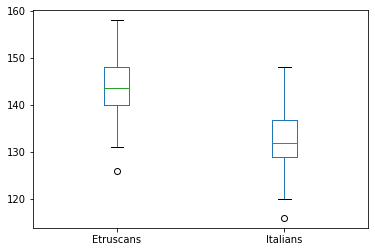

In [6]:
skulls.plot(kind="box")
plt.show()

## Calculate a 100(1-a)% confidence interval

### Check assumptions

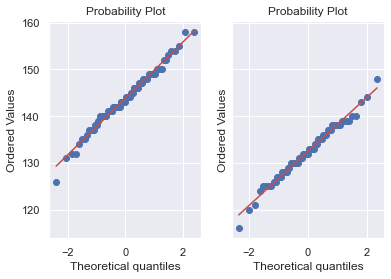

In [7]:
# check normality using normal probability plots
sns.set_theme()
f, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, sharey=True)
ax1 = probplot(x=etr, plot=ax1)
ax1 = probplot(x=ita, plot=ax2)
plt.show()

Add commentary

### Check for common variance

In [12]:
if etr.var() > ita.var():
    print(etr.var()/ita.var())
else:
    print(ita.var()/etr.var())

1.078190046662236


### Return the confidence interval

In [9]:
# get difference, degree of freedom, and estimated stand error
# included for clarity
dof = get_dof(etr, ita)
diff = etr.mean() - ita.mean()
ese = get_ese(etr, ita)

In [10]:
# calculate the ci
t.interval(
    alpha=0.95,
    df=dof,
    loc=diff,
    scale=ese)

(9.453650451007142, 13.208254310897594)